## Workflow - Possession % (Team)

---
> ### 1. SET UP DEVELOPMENT ENVIRONMENT

**1.0 Import required Python software into current development environment (i.e. this notebook)**
```
import pandas as pd
```

In [16]:
import pandas as pd

**1.1 Configure notebook for code autocompletion + displaying plots + displaying max columns and rows of panda data objects**
```
%config Completer.use_jedi = False
%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows = None
```

In [17]:
%config Completer.use_jedi = False
%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows = None

---
> ### 2. LOAD & PREP DATA

**2.0 Data Load** - read in the `match_events.csv` file located in the `data` directory (folder)
```
raw_data = pd.read_csv("data/match_events.csv")
```

In [18]:
raw_data = pd.read_csv("data/match_events.csv")

**2.1 Data Prep** - make a copy of raw data to work on called `df`

```
df = raw_data.copy()
```

In [19]:
df = raw_data.copy()

**2.2 Data Prep** - use the `head()` function to check the first 5 rows of the `df` object, which is a `pandas` dataframe (df), basically a 2 dimensional data structure with rows & columns 
```
df.head()
```

In [20]:
df.head()

,start_min,start_sec,end_min,end_sec,match_half,player1,player1_team,player2,player2_team,event,press,press_team,start_x,start_y,end_x,end_y,press_x,press_y
0,0,0,0.0,0.0,1,fernandes,man_u,NaN,NaN,set_piece,NaN,NaN,52.5,34.0,NaN,NaN,NaN,NaN
1,0,0,0.0,1.0,1,fernandes,man_u,ronaldo,man_u,completed_pass,NaN,NaN,52.5,34.0,55.8,31.3,NaN,NaN
2,0,1,0.0,2.0,1,ronaldo,man_u,matic,man_u,completed_pass,odegaard,arsenal,55.8,31.3,65.6,33.4,55.7,30.4
3,0,2,0.0,3.0,1,matic,man_u,dalot,man_u,completed_pass,nketiah,arsenal,65.6,33.4,72.2,55.2,63.4,36.4
4,0,3,0.0,5.0,1,dalot,man_u,NaN,NaN,incomplete_pass,NaN,NaN,72.2,55.2,NaN,NaN,NaN,NaN


**2.3 Data Prep** - check the dimensions of the `df` (<no. of rows>, <no. of columns>). Should be (1854, 18).
```
df.shape
```

In [21]:
df.shape

(1854, 18)

---
> ### 3. EXPLORATORY DATA ANALYSIS (EDA)

**3.0 EDA** - create a new variable (object) called `pass_filter` that can be used to filter the `df` for just the `"completed_pass"` events
```
pass_filter = (df["event"] == "completed_pass")
```

In [22]:
pass_filter = (df["event"] == "completed_pass")

**3.1 EDA** - use the `pass_filter` to view the `df` filtered for just the `"completed_pass"` events, also chaining on the `head()` function 
```
df[pass_filter].head()
```

In [23]:
df[pass_filter].head()

,start_min,start_sec,end_min,end_sec,match_half,player1,player1_team,player2,player2_team,event,press,press_team,start_x,start_y,end_x,end_y,press_x,press_y
1,0,0,0.0,1.0,1,fernandes,man_u,ronaldo,man_u,completed_pass,NaN,NaN,52.5,34.0,55.8,31.3,NaN,NaN
2,0,1,0.0,2.0,1,ronaldo,man_u,matic,man_u,completed_pass,odegaard,arsenal,55.8,31.3,65.6,33.4,55.7,30.4
3,0,2,0.0,3.0,1,matic,man_u,dalot,man_u,completed_pass,nketiah,arsenal,65.6,33.4,72.2,55.2,63.4,36.4
8,0,8,0.0,10.0,1,elneny,arsenal,cedric,arsenal,completed_pass,fernandes,man_u,37.6,40.0,28.8,18.3,37.4,42.6
17,0,28,0.0,30.0,1,cedric,arsenal,white,arsenal,completed_pass,NaN,NaN,57.6,7.6,56.1,10.2,NaN,NaN


**3.2 EDA** - copy the code from `3.1` and also specify selecting only the `player1_team` and `event` columns of this pass-filtered `df`
```
df[pass_filter][["player1_team", "event"]].head()
```

In [24]:
df[pass_filter][["player1_team", "event"]].head()

,player1_team,event
1,man_u,completed_pass
2,man_u,completed_pass
3,man_u,completed_pass
8,arsenal,completed_pass
17,arsenal,completed_pass


**3.3 EDA** - copy the code from `3.2` and chain on another function called `groupby()`, specifying `player1_team` as the column to group the data by, finally chaining a `size()` function after
```
df[pass_filter][["player1_team", "event"]].groupby("player1_team").size()
```

In [25]:
df[pass_filter][["player1_team", "event"]].groupby("player1_team").size()

player1_team
arsenal    450
man_u      341
dtype: int64

---
> ### 4. DATA ANALYSIS & VISUALISATION

**4.0 VIZ** - copy the code from `3.3` and further chain a function called `plot()`, specifying the kind of plot as a `pie` and automatic % calculation in the format `%.0f%%`
```
df[pass_filter][["player1_team", "event"]].groupby("player1_team").size().plot(kind="pie", autopct="%.0f%%")
```

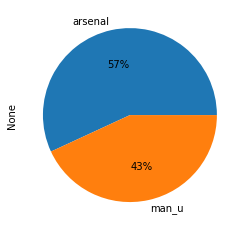

In [26]:
df[pass_filter][["player1_team", "event"]].groupby("player1_team").size().plot(kind="pie", autopct="%.0f%%")

**4.1 VIZ** - copy the code from `4.0` and specify an additional input in the `plot()` function, namely the `colors` of the plot as a list object (`[]`) with 2 named colors that will be applied to the 2 categories in alphabetical order | TIP: Check out the range of official named colors you can use with matplotlib https://matplotlib.org/stable/gallery/color/named_colors.html#css-colors

```
df[pass_filter][["player1_team", "event"]].groupby("player1_team").size().plot(kind="pie", autopct="%.0f%%", colors=["red", "blue"])
```

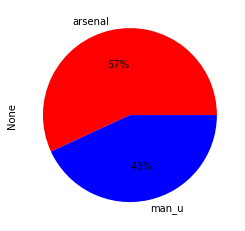

In [27]:
df[pass_filter][["player1_team", "event"]].groupby("player1_team").size().plot(kind="pie", autopct="%.0f%%", colors=["red", "blue"])

---

_Sports Python Educational Project content, licensed under Attribution-NonCommercial-ShareAlike 4.0 International_